In [1063]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3

In [1064]:
conn = sqlite3.connect('/Users/um/Desktop/Wild Code School/Top_gun/Datasets/top_gun_data_1.db')

In [1065]:
"""
la table df_degradation rajouter une ligne avec une date initiale et les valeurs initiales correspondantes : usure, lifespan.
rajouter la description
créer un dictionnaire avec ref_compo et clé et desc en valeurs et appliquer a la table pivotée.
pivoter la table degradation avec en index : date/ id_aero et en colonne les composants/usure, composants/lifespan
    
"""

'\nla table df_degradation rajouter une ligne avec une date initiale et les valeurs initiales correspondantes : usure, lifespan.\nrajouter la description\ncréer un dictionnaire avec ref_compo et clé et desc en valeurs et appliquer a la table pivotée.\npivoter la table degradation avec en index : date/ id_aero et en colonne les composants/usure, composants/lifespan\n    \n'

# Préparation des données

In [1066]:
df_aeronefs = pd.read_sql_query('select * from aeronefs', conn)
df_composants = pd.read_sql_query('select * from composants', conn)
df_degradations = pd.read_sql_query('select * from degradations', conn)
df_logs_vols = pd.read_sql_query('select * from logs_vols', conn)

In [1067]:
df_aeronefs.rename(columns={"ref_aero": "id_aero"}, inplace=True)
df_composants.rename(columns={
    "aero": "id_aero",
    "taux_usure_actuel" : "usure_cumulee"
                              
                              }, inplace=True)
df_degradations.rename(columns={
    "linked_aero": "id_aero",
    "compo_concerned" : "ref_compo",
    'usure_nouvelle' : 'usure_cumulee',
    }, inplace=True)
df_logs_vols.rename(columns={"aero_linked": "id_aero",
                             "jour_vol" : "measure_day"},
                    inplace=True)


In [1068]:
display(df_aeronefs.head(2))
display(df_composants.head(2))
display(df_degradations.head(2))
display(df_logs_vols.head(2))

,id_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01
1,B767_2803,B767,2020-12-03,2024-06-01,0,1970-01-01


,ref_compo,categorie,id_aero,desc,lifespan,usure_cumulee,cout
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0
1,REAE170-E170_6353-1,2,E170_6353,Réacteur droit,13626.0,50.111950,17559.0


,ref_deg,id_aero,ref_compo,usure_cumulee,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0
1,D009402,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0


,ref_vol,id_aero,measure_day,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.558


In [1069]:
"""
j'ajoute une colonne measure_date et une colonne need_replacement a la table des composants

"""
df_composants['measure_day'] = '2024-05-31'
df_composants['measure_day'] = pd.to_datetime(df_composants['measure_day'])
df_degradations['measure_day'] = pd.to_datetime(df_degradations['measure_day'])

In [1070]:
df_composants

,ref_compo,categorie,id_aero,desc,lifespan,usure_cumulee,cout,measure_day
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0,2024-05-31
1,REAE170-E170_6353-1,2,E170_6353,Réacteur droit,13626.0,50.111950,17559.0,2024-05-31
2,SYSE170-E170_6353-2,2,E170_6353,Système de navigation,10541.0,16.730575,16514.0,2024-05-31
3,ORDE170-E170_6353-3,2,E170_6353,Ordinateur de vol,10441.0,6.653075,16047.0,2024-05-31
4,AUTE170-E170_6353-4,2,E170_6353,Autopilote,14847.0,42.033525,19362.0,2024-05-31
...,...,...,...,...,...,...,...,...
10345,SYSCRJ700-CRJ700_2988-40,0,CRJ700_2988,Systèmes d'oxygène d'urgence,13038.0,53.323168,4745.0,2024-05-31
10346,PORCRJ700-CRJ700_2988-41,0,CRJ700_2988,Portes passagers,13107.0,16.392552,3053.0,2024-05-31
10347,HUBCRJ700-CRJ700_2988-42,0,CRJ700_2988,Hublots,68978.0,34.551008,3593.0,2024-05-31
10348,ECLCRJ700-CRJ700_2988-43,0,CRJ700_2988,Éclairage de la cabine,10639.0,36.706904,4965.0,2024-05-31


In [1071]:
df_degradations

,ref_deg,id_aero,ref_compo,usure_cumulee,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0
1,D009402,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0
2,D000812,E170_6353,SYSE170-E170_6353-2,17.0,2024-06-01,0
3,D006665,E170_6353,ORDE170-E170_6353-3,7.0,2024-06-01,0
4,D001163,E170_6353,AUTE170-E170_6353-4,42.0,2024-06-01,0
...,...,...,...,...,...,...
101650,D006322,CRJ700_2988,SYSCRJ700-CRJ700_2988-40,58.0,2024-06-23,0
101651,D005497,CRJ700_2988,PORCRJ700-CRJ700_2988-41,21.0,2024-06-23,0
101652,D005625,CRJ700_2988,HUBCRJ700-CRJ700_2988-42,60.0,2024-06-23,0
101653,D003657,CRJ700_2988,ECLCRJ700-CRJ700_2988-43,41.0,2024-06-23,0


In [1072]:
""" concatener la table composants et degradations en une seule : compodeg """

df_compodeg = pd.concat(
    [
        df_composants.drop(columns = ['lifespan', 'cout', 'desc', 'categorie']),
        df_degradations.drop(columns = ['ref_deg'])
    ]

)

In [1073]:
df_compodeg.fillna(0)

,ref_compo,id_aero,usure_cumulee,measure_day,need_replacement
0,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,0.0
1,REAE170-E170_6353-1,E170_6353,50.111950,2024-05-31,0.0
2,SYSE170-E170_6353-2,E170_6353,16.730575,2024-05-31,0.0
3,ORDE170-E170_6353-3,E170_6353,6.653075,2024-05-31,0.0
4,AUTE170-E170_6353-4,E170_6353,42.033525,2024-05-31,0.0
...,...,...,...,...,...
101650,SYSCRJ700-CRJ700_2988-40,CRJ700_2988,58.000000,2024-06-23,0.0
101651,PORCRJ700-CRJ700_2988-41,CRJ700_2988,21.000000,2024-06-23,0.0
101652,HUBCRJ700-CRJ700_2988-42,CRJ700_2988,60.000000,2024-06-23,0.0
101653,ECLCRJ700-CRJ700_2988-43,CRJ700_2988,41.000000,2024-06-23,0.0


In [1075]:
data = pd.merge(
    df_compodeg,
    df_logs_vols,
    on='id_aero',
    how='outer'
)

In [1076]:
data

,ref_compo,id_aero,usure_cumulee,measure_day_x,need_replacement,ref_vol,measure_day_y,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,NaN,V01188885,2024-06-04,6.9,0,-2.2,980.7,1.235
1,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,NaN,V03464203,2024-06-06,1.8,0,2.9,953.5,0.942
2,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,NaN,V03945543,2024-06-07,9.9,1,-12.4,918.2,3.568
3,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,NaN,V09402949,2024-06-11,6.7,0,1.7,944.9,3.377
4,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,NaN,V09070502,2024-06-12,6.9,0,3.7,984.5,4.178
...,...,...,...,...,...,...,...,...,...,...,...,...
1083730,SYSCRJ700-CRJ700_2988-44,CRJ700_2988,18.000000,2024-06-23,0.0,V07268644,2024-06-08,5.5,0,1.7,969.1,0.639
1083731,SYSCRJ700-CRJ700_2988-44,CRJ700_2988,18.000000,2024-06-23,0.0,V02250176,2024-06-18,2.6,0,12.6,1001.0,2.285
1083732,SYSCRJ700-CRJ700_2988-44,CRJ700_2988,18.000000,2024-06-23,0.0,V07506126,2024-06-19,7.5,1,-14.7,983.1,0.456
1083733,SYSCRJ700-CRJ700_2988-44,CRJ700_2988,18.000000,2024-06-23,0.0,V06175115,2024-06-21,2.4,0,6.5,989.2,0.467


In [1077]:
data.isnull().sum()

ref_compo                 0
id_aero                   0
usure_cumulee             0
measure_day_x             0
need_replacement      95760
ref_vol                   0
measure_day_y             0
time_en_air               0
etat_voyant               0
temp en °C                0
pressure en hPa           0
vibrations en m/s²        0
dtype: int64

In [1078]:
data.drop(columns = ['ref_vol',	'measure_day_y'], inplace = True)
data.rename(
    columns = {
       'measure_day_x' :'measure_day'
    },
    inplace = True
)

In [1079]:
data['need_replacement'].fillna(0, inplace=True)
data['need_replacement'] = data['need_replacement'].astype(bool)

In [1107]:
""" 
recuperer le cout, le lifespan, la categorie et la description de la table df_composants dans un dictionnaire

"""
dict_composants = {}

for index, row in df_composants.iterrows():
    dict_composants[row['ref_compo']] = {
        'categorie' : row['categorie'],
        'desc' : row['desc'],
        'cout' : row['cout'],
        'lifespan' : row['lifespan']
    }
    
dict_composants

{'REAE170-E170_6353-0': {'categorie': 2,
  'desc': 'Réacteur gauche',
  'cout': 15552.0,
  'lifespan': 13045.0},
 'REAE170-E170_6353-1': {'categorie': 2,
  'desc': 'Réacteur droit',
  'cout': 17559.0,
  'lifespan': 13626.0},
 'SYSE170-E170_6353-2': {'categorie': 2,
  'desc': 'Système de navigation',
  'cout': 16514.0,
  'lifespan': 10541.0},
 'ORDE170-E170_6353-3': {'categorie': 2,
  'desc': 'Ordinateur de vol',
  'cout': 16047.0,
  'lifespan': 10441.0},
 'AUTE170-E170_6353-4': {'categorie': 2,
  'desc': 'Autopilote',
  'cout': 19362.0,
  'lifespan': 14847.0},
 'SYSE170-E170_6353-5': {'categorie': 2,
  'desc': 'Système de contrôle de vol',
  'cout': 19492.0,
  'lifespan': 12580.0},
 'RADE170-E170_6353-6': {'categorie': 2,
  'desc': 'Radar météorologique',
  'cout': 17567.0,
  'lifespan': 11923.0},
 'SYSE170-E170_6353-7': {'categorie': 2,
  'desc': 'Système de communication radio',
  'cout': 19214.0,
  'lifespan': 10370.0},
 'SYSE170-E170_6353-8': {'categorie': 2,
  'desc': 'Système de 

In [1083]:
""" ajouter les colonnes 'lifespan', 'cout', 'categorie' et 'desc' du dictionnaire à data """

for key, value in dict_composants.items():
    data.loc[data['ref_compo'] == key, 'categorie'] = value['categorie']
    data.loc[data['ref_compo'] == key, 'desc'] = value['desc']
    data.loc[data['ref_compo'] == key, 'cout'] = value['cout']
    data.loc[data['ref_compo'] == key, 'lifespan'] = value['lifespan']

In [1110]:
data.head(1)

,ref_compo,id_aero,usure_cumulee,measure_day,need_replacement,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,categorie,desc,cout,lifespan
0,REAE170-E170_6353-0,E170_6353,53.308375,2024-05-31,False,6.9,0,-2.2,980.7,1.235,2,Réacteur gauche,15552.0,13045.0


In [1130]:
data['categorie'] = data['categorie'].astype(int)
data['etat_voyant'] = data['etat_voyant'].astype(bool)

/var/folders/39/cywg6p994nx3r3m3g0y5d1s00000gn/T/ipykernel_25381/220651437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categorie'] = data['categorie'].astype(int)
/var/folders/39/cywg6p994nx3r3m3g0y5d1s00000gn/T/ipykernel_25381/220651437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['etat_voyant'] = data['etat_voyant'].astype(bool)


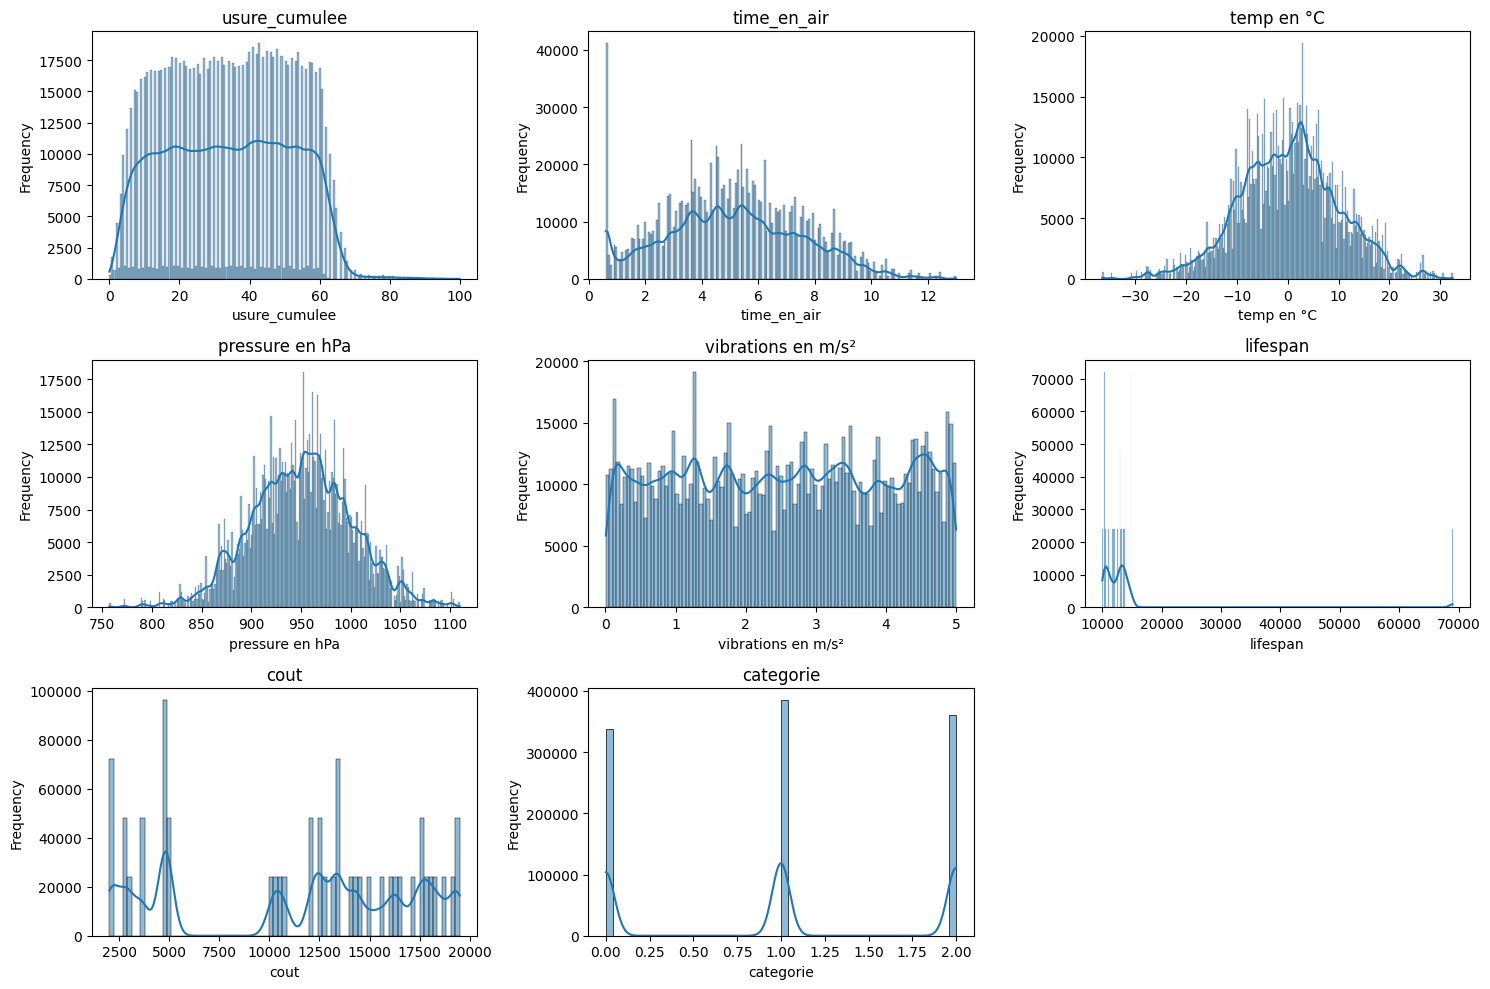

In [1131]:
""" 
Graphiques des valeurs numériques de la table mergée

"""
numerical_columns = data.select_dtypes(include='number').columns

grid_size = (3, 3) 

plt.figure(figsize=(15, 10))

for idx, column in enumerate(numerical_columns, 1):
    plt.subplot(grid_size[0], grid_size[1], idx)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.histplot(data[column], kde=True)
    plt.tight_layout()

plt.show()

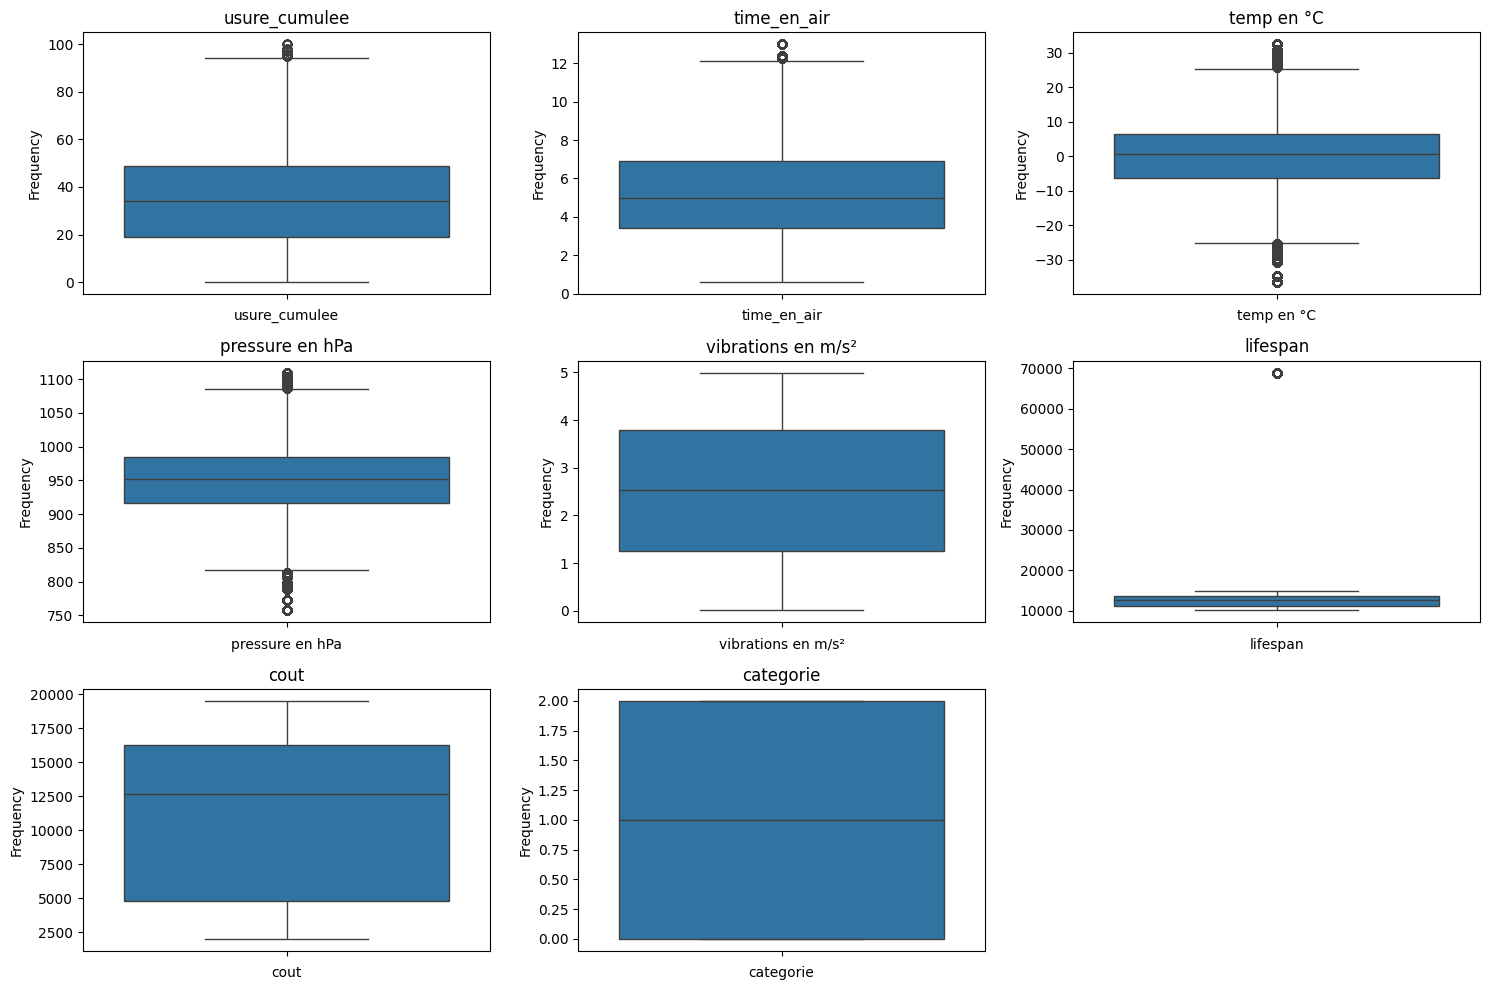

In [1135]:
""" 
Graphiques des valeurs numériques de la table mergée

"""
numerical_columns = data.select_dtypes(include='number').columns

grid_size = (3, 3) 

plt.figure(figsize=(15, 10))

for idx, column in enumerate(numerical_columns, 1):
    plt.subplot(grid_size[0], grid_size[1], idx)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.boxplot(data[column])
    plt.tight_layout()

plt.show()

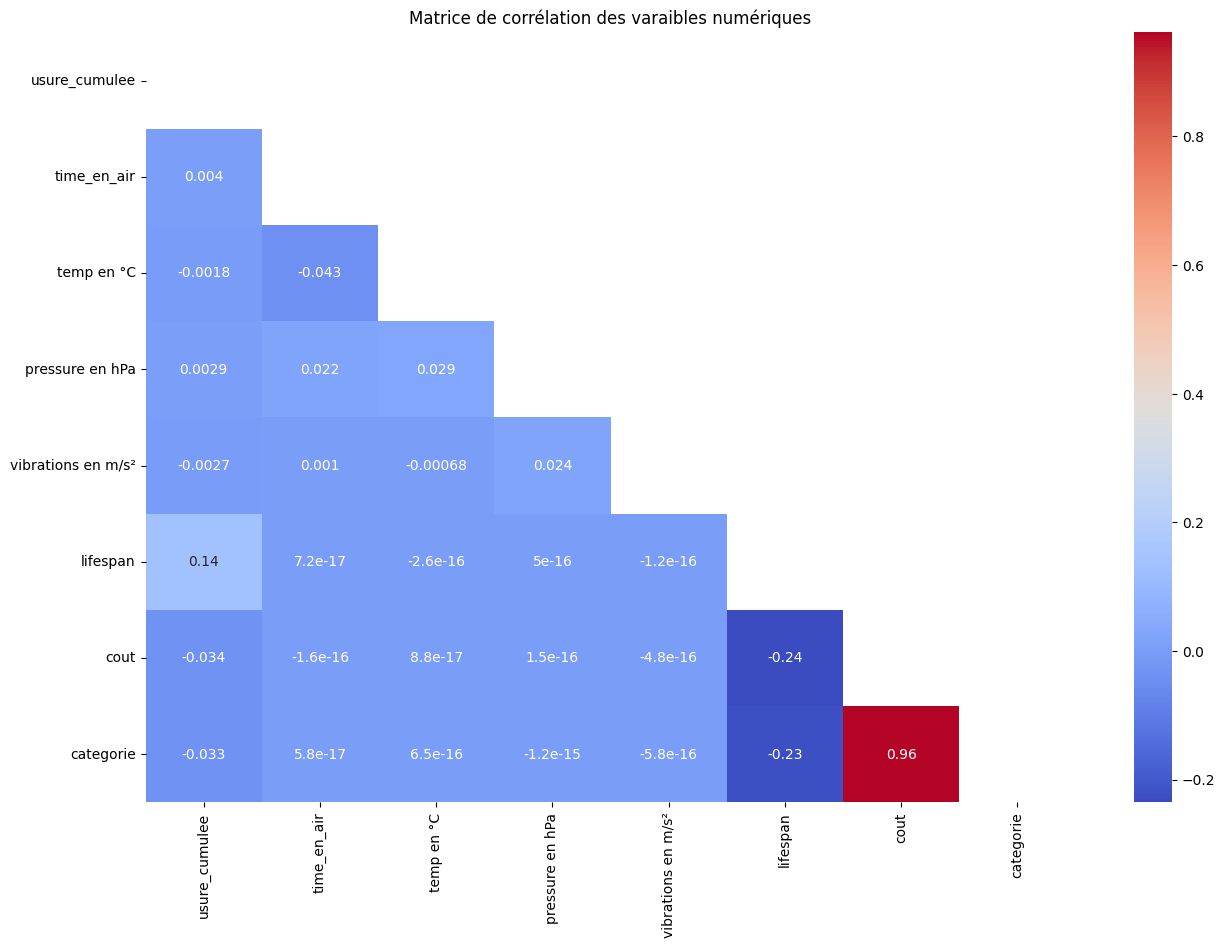

In [1132]:
plt.figure(figsize=(15,10))
mumeric_columns = data.select_dtypes(include=['number']).columns
matrix = data[mumeric_columns].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, cmap='coolwarm', mask = mask)
plt.title('Matrice de corrélation des varaibles numériques')
plt.show()

In [1091]:
data['ref_compo'].unique()

array(['REAE170-E170_6353-0', 'REAE170-E170_6353-1',
       'SYSE170-E170_6353-2', ..., 'HUBCRJ700-CRJ700_2988-42',
       'ECLCRJ700-CRJ700_2988-43', 'SYSCRJ700-CRJ700_2988-44'],
      dtype=object)

In [1122]:
def usure_composant(data, ref_compo):
    """
    Fonction permettant de réaliser un tracé l'usure cumulée d'un composant.

    Parameters:
    data (DataFrame): DataFrame contenant les données de mesure.
    ref_compo (str): Référence du composant à tracer.
    
    """
    if ref_compo not in data['ref_compo'].values:
        print(f"Référence du composant {ref_compo} non trouvée dans les données.")
        return
    compo_data = data[data['ref_compo'] == ref_compo]

    if compo_data.empty:
        print(f"Aucune donnée trouvée pour la référence du composant {ref_compo}.")
        return
    plt.figure(figsize=(15, 8))
    plt.plot(compo_data['measure_day'], compo_data['usure_cumulee'], label=compo_data['desc'].iloc[0])
    plt.xlabel('Jour de mesure')
    plt.ylabel('Usure cumulée (%)')
    plt.title(f'Usure cumulée pour le composant {ref_compo}')
    plt.legend()
    plt.grid(True)
    plt.show()



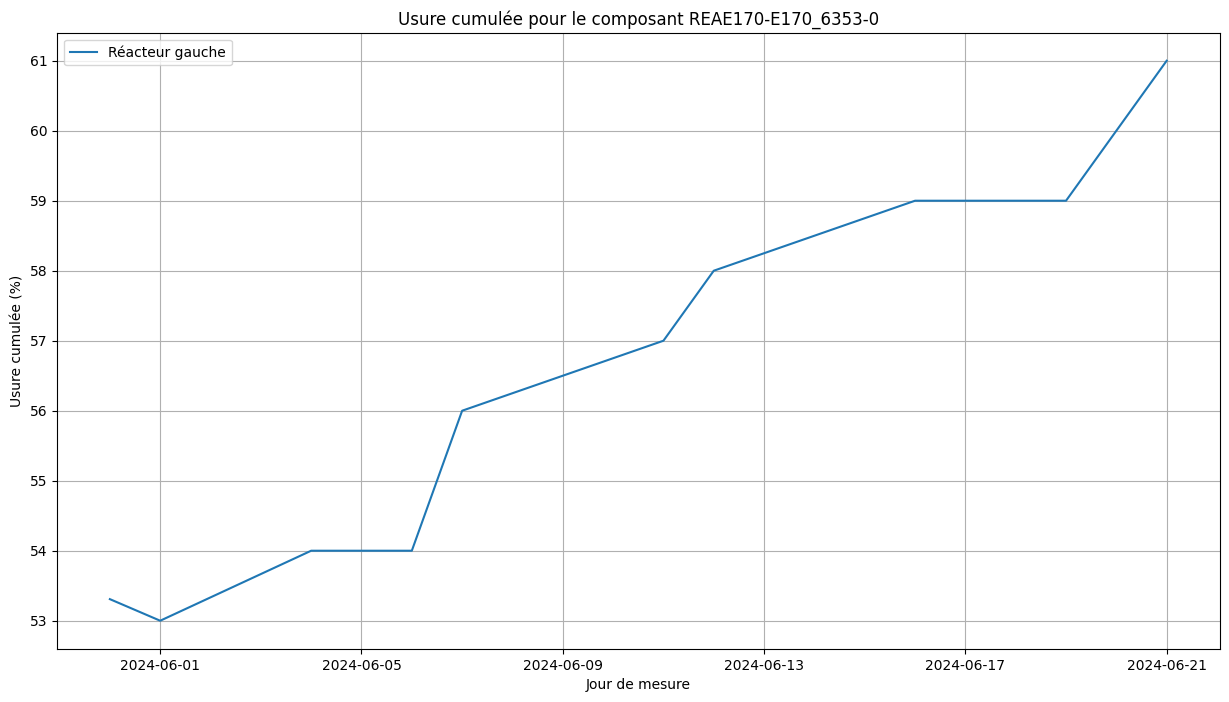

In [1151]:
usure_composant(data, 'REAE170-E170_6353-0')

# Machine learning

In [1120]:
""" 
reorganisation les colonne de date pour le machine learning

"""

data = data[[
    'id_aero',
    'ref_compo',
    'desc',
    'measure_day',
    'usure_cumulee',
    'time_en_air',
    'temp en °C',
    'pressure en hPa',
    'vibrations en m/s²',
    'lifespan',
    'cout',
    'categorie',
    'etat_voyant'
    
]]

In [1137]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [1133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083735 entries, 0 to 1083734
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id_aero             1083735 non-null  object        
 1   ref_compo           1083735 non-null  object        
 2   desc                1083735 non-null  object        
 3   measure_day         1083735 non-null  datetime64[ns]
 4   usure_cumulee       1083735 non-null  float64       
 5   time_en_air         1083735 non-null  float64       
 6   temp en °C          1083735 non-null  float64       
 7   pressure en hPa     1083735 non-null  float64       
 8   vibrations en m/s²  1083735 non-null  float64       
 9   lifespan            1083735 non-null  float64       
 10  cout                1083735 non-null  float64       
 11  categorie           1083735 non-null  int64         
 12  etat_voyant         1083735 non-null  bool          
dtypes: bool(1), 

In [1153]:
data

,id_aero,ref_compo,desc,measure_day,usure_cumulee,time_en_air,temp en °C,pressure en hPa,vibrations en m/s²,lifespan,cout,categorie,etat_voyant
0,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,6.9,-2.2,980.7,1.235,13045.0,15552.0,2,False
1,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,1.8,2.9,953.5,0.942,13045.0,15552.0,2,False
2,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,9.9,-12.4,918.2,3.568,13045.0,15552.0,2,True
3,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,6.7,1.7,944.9,3.377,13045.0,15552.0,2,False
4,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,6.9,3.7,984.5,4.178,13045.0,15552.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083730,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,5.5,1.7,969.1,0.639,12796.0,4701.0,0,False
1083731,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,2.6,12.6,1001.0,2.285,12796.0,4701.0,0,False
1083732,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,7.5,-14.7,983.1,0.456,12796.0,4701.0,0,True
1083733,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,2.4,6.5,989.2,0.467,12796.0,4701.0,0,False


In [1127]:
""" preparation for training """
X = data.drop('etat_voyant', axis = 1)
y = data['etat_voyant']

In [1136]:
categorical_features = ['ref_compo', 'desc']
numerical_features = ['usure_cumulee', 'time_en_air', 'temp en °C', 'pressure en hPa', 'vibrations en m/s²', 'lifespan', 'cout', 'categorie']

In [1139]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

In [1145]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ref_compo', 'desc']),
                                                 ('num', StandardScaler(),
                                                  ['usure_cumulee',
                                                   'time_en_air', 'temp en °C',
                                                   'pressure en hPa',
                                                   'vibrations en m/s²',
                                                   'lifespan', 'cout',
                                                   'categorie'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [1142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1146]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ref_compo', 'desc']),
                                                 ('num', StandardScaler(),
                                                  ['usure_cumulee',
                                                   'time_en_air', 'temp en °C',
                                                   'pressure en hPa',
                                                   'vibrations en m/s²',
                                                   'lifespan', 'cout',
                                                   'categorie'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [1144]:
y_pred = pipeline.predict(X_test)

In [1147]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [1149]:
data

,id_aero,ref_compo,desc,measure_day,usure_cumulee,time_en_air,temp en °C,pressure en hPa,vibrations en m/s²,lifespan,cout,categorie,etat_voyant
0,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,6.9,-2.2,980.7,1.235,13045.0,15552.0,2,False
1,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,1.8,2.9,953.5,0.942,13045.0,15552.0,2,False
2,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,9.9,-12.4,918.2,3.568,13045.0,15552.0,2,True
3,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,6.7,1.7,944.9,3.377,13045.0,15552.0,2,False
4,E170_6353,REAE170-E170_6353-0,Réacteur gauche,2024-05-31,53.308375,6.9,3.7,984.5,4.178,13045.0,15552.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083730,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,5.5,1.7,969.1,0.639,12796.0,4701.0,0,False
1083731,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,2.6,12.6,1001.0,2.285,12796.0,4701.0,0,False
1083732,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,7.5,-14.7,983.1,0.456,12796.0,4701.0,0,True
1083733,CRJ700_2988,SYSCRJ700-CRJ700_2988-44,Système d'approvisionnement en eau,2024-06-23,18.000000,2.4,6.5,989.2,0.467,12796.0,4701.0,0,False


In [1155]:
df_aeronefs

,id_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01
1,B767_2803,B767,2020-12-03,2024-06-01,0,1970-01-01
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,1,2024-06-03
3,A350_1177,A350,2005-08-07,2024-01-04,0,1970-01-01
4,B777_4029,B777,2009-01-01,2024-06-01,0,1970-01-01
...,...,...,...,...,...,...
225,A350_6305,A350,2009-03-09,2024-06-01,0,1970-01-01
226,B737_4369,B737,2010-01-05,2024-06-01,0,1970-01-01
227,A340_4021,A340,2004-12-13,2024-05-31,0,1970-01-01
228,CRJ900_1740,CRJ900,2003-07-20,2024-06-01,0,1970-01-01


In [1154]:
df_logs_vols

,ref_vol,id_aero,measure_day,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.558
2,V07933973,B757_2518,2024-06-02,7.7,3,-6.2,975.5,4.587
3,V02230187,A340_1047,2024-06-02,6.1,1,-25.3,945.1,3.288
4,V09071213,B757_6806,2024-06-02,4.5,0,11.1,931.3,2.817
...,...,...,...,...,...,...,...,...
2123,V08726632,A380_0710,2024-06-23,5.6,1,-24.5,871.5,0.985
2124,V00567782,E175_5414,2024-06-23,9.3,0,16.6,937.2,1.152
2125,V03348107,A320_2497,2024-06-23,3.0,0,2.7,977.0,2.861
2126,V05253489,CRJ700_0969,2024-06-23,0.6,0,-0.7,992.5,2.627


In [1150]:
df_degradations

,ref_deg,id_aero,ref_compo,usure_cumulee,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,53.0,2024-06-01,0
1,D009402,E170_6353,REAE170-E170_6353-1,50.0,2024-06-01,0
2,D000812,E170_6353,SYSE170-E170_6353-2,17.0,2024-06-01,0
3,D006665,E170_6353,ORDE170-E170_6353-3,7.0,2024-06-01,0
4,D001163,E170_6353,AUTE170-E170_6353-4,42.0,2024-06-01,0
...,...,...,...,...,...,...
101650,D006322,CRJ700_2988,SYSCRJ700-CRJ700_2988-40,58.0,2024-06-23,0
101651,D005497,CRJ700_2988,PORCRJ700-CRJ700_2988-41,21.0,2024-06-23,0
101652,D005625,CRJ700_2988,HUBCRJ700-CRJ700_2988-42,60.0,2024-06-23,0
101653,D003657,CRJ700_2988,ECLCRJ700-CRJ700_2988-43,41.0,2024-06-23,0


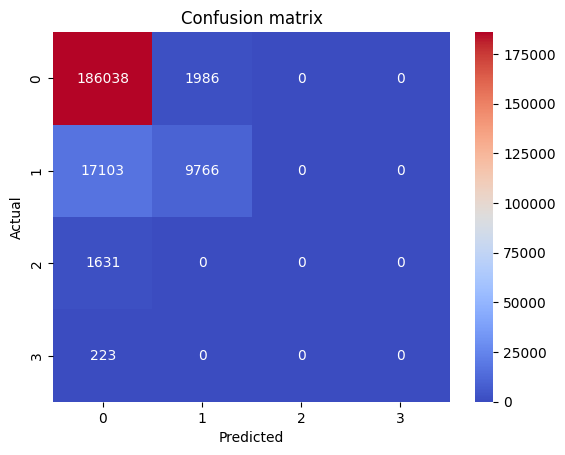

In [1148]:
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()